In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#2. Load the dataset

In [ ]:
dataset=pd.read_csv(r"db/Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#3. Perform Below Visualizations

#a) Univariate Analysis

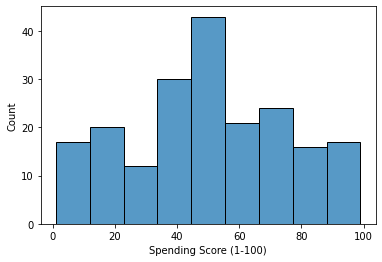

In [ ]:
sns.histplot(dataset['Spending Score (1-100)'])

#b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


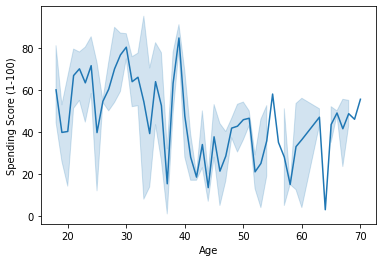

In [ ]:
sns.lineplot(dataset['Age'],dataset['Spending Score (1-100)'])

#c)Multi - Variate Analysis

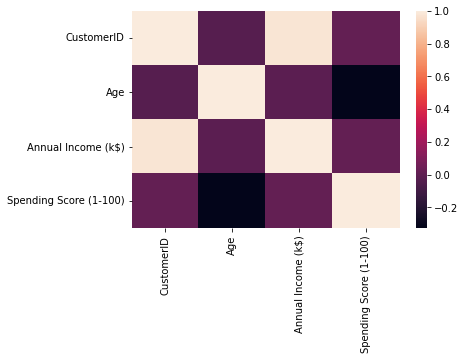

In [ ]:
sns.heatmap(dataset.corr())

#4. Perform descriptive statistics on the dataset

In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

#5. Check for Missing values and deal with them.

In [ ]:
dataset.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

#6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


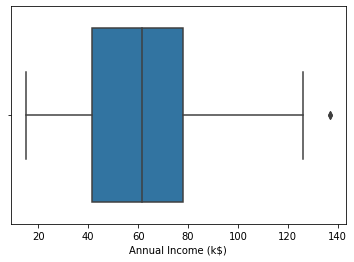

In [ ]:
sns.boxplot(dataset['Annual Income (k$)'])

In [ ]:
q=dataset.quantile([0.95,0.85])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.95,190.05,66.05,103.0,92.0
0.85,170.15,54.15,87.0,79.3


In [ ]:
iqr=q.iloc[0]-q.iloc[1]
iqr

CustomerID                19.9
Age                       11.9
Annual Income (k$)        16.0
Spending Score (1-100)    12.7
dtype: float64

In [ ]:
u=q.iloc[0]+(1.5*iqr)
u

CustomerID                219.90
Age                        83.90
Annual Income (k$)        127.00
Spending Score (1-100)    111.05
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)
l

CustomerID                140.30
Age                        36.30
Annual Income (k$)         63.00
Spending Score (1-100)     60.25
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


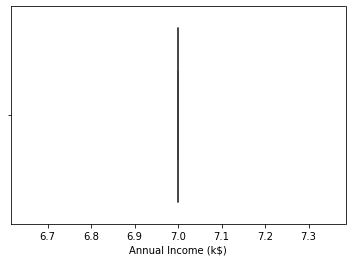

In [ ]:
dataset['Annual Income (k$)']=np.where(dataset['Annual Income (k$)']>10,7,dataset['Annual Income (k$)'])
sns.boxplot(dataset['Annual Income (k$)'])

#7. Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,7,39
1,2,1,21,7,81
2,3,0,20,7,6
3,4,0,23,7,77
4,5,0,31,7,40


#8. Scaling the data

In [ ]:
x=dataset.drop('Spending Score (1-100)',axis=1)
y=dataset['Spending Score (1-100)']
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,7
1,2,1,21,7
2,3,0,20,7
3,4,0,23,7
4,5,0,31,7
...,...,...,...,...
195,196,0,35,7
196,197,0,45,7
197,198,1,32,7
198,199,1,32,7


In [ ]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=MinMaxScaler()
axisX=s.fit_transform(x)
axisX

array([[0.        , 1.        , 0.01923077, 0.        ],
       [0.00502513, 1.        , 0.05769231, 0.        ],
       [0.01005025, 0.        , 0.03846154, 0.        ],
       [0.01507538, 0.        , 0.09615385, 0.        ],
       [0.0201005 , 0.        , 0.25      , 0.        ],
       [0.02512563, 0.        , 0.07692308, 0.        ],
       [0.03015075, 0.        , 0.32692308, 0.        ],
       [0.03517588, 0.        , 0.09615385, 0.        ],
       [0.04020101, 1.        , 0.88461538, 0.        ],
       [0.04522613, 0.        , 0.23076923, 0.        ],
       [0.05025126, 1.        , 0.94230769, 0.        ],
       [0.05527638, 0.        , 0.32692308, 0.        ],
       [0.06030151, 0.        , 0.76923077, 0.        ],
       [0.06532663, 0.        , 0.11538462, 0.        ],
       [0.07035176, 1.        , 0.36538462, 0.        ],
       [0.07537688, 1.        , 0.07692308, 0.        ],
       [0.08040201, 0.        , 0.32692308, 0.        ],
       [0.08542714, 1.        ,

#9. Perform any of the clustering algorithms

In [ ]:
from sklearn.cluster import KMeans
km=KMeans()
clust=km.fit_predict(axisX)
clust

array([4, 4, 7, 7, 7, 7, 7, 7, 1, 7, 1, 7, 0, 7, 4, 4, 7, 4, 1, 7, 4, 4,
       0, 4, 0, 4, 0, 4, 7, 7, 1, 7, 1, 4, 0, 7, 7, 7, 7, 7, 0, 4, 1, 7,
       0, 7, 0, 7, 7, 7, 0, 4, 7, 1, 0, 1, 0, 1, 7, 1, 1, 4, 0, 0, 1, 4,
       0, 0, 4, 5, 1, 0, 0, 0, 1, 4, 0, 6, 5, 0, 1, 6, 1, 0, 5, 6, 0, 5,
       5, 0, 0, 4, 6, 5, 5, 4, 0, 5, 6, 4, 5, 0, 1, 3, 6, 5, 0, 6, 1, 1,
       1, 5, 5, 3, 5, 5, 0, 0, 0, 0, 3, 5, 2, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       5, 5, 3, 5, 2, 3, 3, 2, 0, 3, 5, 2, 3, 3, 6, 2, 2, 3, 6, 6, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 6, 2, 6, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       6, 3, 6, 3, 2, 2, 6, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 3], dtype=int32)

#10. Add the cluster data with the primary dataset

In [ ]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset1=pd.DataFrame(axisX,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
dataset1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0


In [ ]:
dataset1['Cluster']=pd.Series(clust)
dataset1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.019231,0.0,4
1,0.005025,1.0,0.057692,0.0,4
2,0.010050,0.0,0.038462,0.0,7
3,0.015075,0.0,0.096154,0.0,7
4,0.020101,0.0,0.250000,0.0,7


#11. Split the data into dependent and independent variables.

In [ ]:
x=dataset1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0
...,...,...,...,...
195,0.979899,0.0,0.326923,0.0
196,0.984925,0.0,0.519231,0.0
197,0.989950,1.0,0.269231,0.0
198,0.994975,1.0,0.269231,0.0


In [ ]:
y=dataset1['Cluster']
y

0      4
1      4
2      7
3      7
4      7
      ..
195    2
196    2
197    3
198    3
199    3
Name: Cluster, Length: 200, dtype: int32

#12. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(axisX,y,test_size=0.3,random_state=1)

#13. Build the Model

#14. Train the Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

#15. Test the Model

In [ ]:
predict_test=dtc.predict(x_test)
predict_test

array([7, 0, 0, 1, 2, 3, 4, 7, 7, 2, 3, 1, 7, 0, 1, 0, 2, 7, 0, 1, 4, 7,
       0, 5, 7, 3, 7, 7, 2, 4, 7, 2, 2, 3, 6, 5, 2, 0, 5, 3, 1, 6, 2, 4,
       0, 7, 5, 7, 3, 5, 6, 6, 0, 1, 4, 3, 2, 0, 3, 3], dtype=int32)

In [ ]:
y_test

58     7
40     0
34     0
102    1
184    2
198    3
95     4
4      7
29     7
168    2
171    3
18     1
11     7
89     0
110    1
118    0
159    2
35     7
136    2
59     1
51     4
16     7
44     0
94     5
31     7
162    3
38     7
28     7
193    2
27     4
47     7
165    2
194    2
177    3
176    6
97     5
174    2
73     0
69     5
172    3
108    1
107    6
189    2
14     4
56     0
19     7
114    5
39     7
185    3
124    5
98     6
123    6
119    0
53     1
33     4
179    3
181    2
106    0
199    3
138    3
Name: Cluster, dtype: int32

#16. Measure the performance using Evaluation Metrics.

In [ ]:
from sklearn.metrics import accuracy_score as accSc
accSc(predict_test,y_test)

0.9833333333333333